<a href="https://colab.research.google.com/github/Khoirulmizan/geoviz/blob/main/Jenis_Kelamin_Bandar_Lampung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

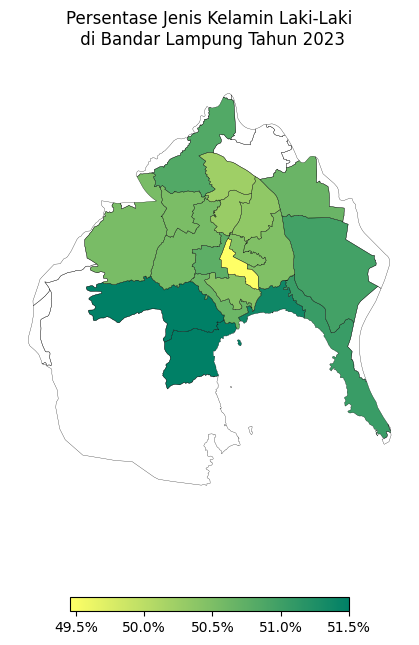

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

csv_path = 'sensus jenis kelamin_bandar lampung.csv'
shape_path = '/content/ADMINISTRASIKECAMATAN_AR_50K.shx'

data_jk = pd.read_csv(csv_path)
shape = gpd.read_file(shape_path)

data_jk.columns = ['KECAMATAN', 'LAKI-LAKI', 'PEREMPUAN']

data_jk['Persentase Laki-Laki'] = data_jk['LAKI-LAKI'] / (data_jk['LAKI-LAKI'] + data_jk['PEREMPUAN']) * 100
data_jk['Persentase Perempuan'] = data_jk['PEREMPUAN'] / (data_jk['LAKI-LAKI'] + data_jk['PEREMPUAN']) * 100

data_jk['KECAMATAN'] = data_jk['KECAMATAN'].str.strip().str.upper()
shape['NAMOBJ'] = shape['NAMOBJ'].str.strip().str.upper()

shape_merged = pd.merge(
    left=shape,
    right=data_jk,
    left_on='NAMOBJ',
    right_on='KECAMATAN',
    how='outer'
)

shape = shape[~shape['NAMOBJ'].isin(['PADANGCERMIN', 'KETIBUNG', 'MERBAUMATARAM', 'WAYLIMA', 'NATAR'])]

ax = shape_merged.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(12, 8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['top', 'right', 'bottom', 'left']:
    ax.spines[edge].set_visible(False)

shape_merged.plot(ax=ax, column='Persentase Laki-Laki', legend=True, cmap='summer_r',
                  legend_kwds={'shrink': 0.3, 'orientation': 'horizontal', 'format': '%.1f%%'})

plt.title('Persentase Jenis Kelamin Laki-Laki\n di Bandar Lampung Tahun 2023\n')
plt.show()